In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# load the dataset
data = pd.read_csv('diabetes.csv')
#description of the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
#seperating the features(X) and labels(y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [5]:
#Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1+np.exp(-x))

#Perceptron class with activtion and optimizer
class Perceptron:
    def __init__(self, learning_rate=0.01, iters= 1000):
        self.lr = learning_rate
        self.iters = iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        samples, features = X.shape
        #initialise weights and bias
        self.weights =np.zeros(features)
        self.bias = 0
        #training using SGD
        for i in range(self.iters):
            for index, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = sigmoid(linear_output)
                error = y[index] - y_pred

                #update weights and bias
                self.weights += self.lr * error * x_i
                self.bias += self.lr * error

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_output)
        return np.where(y_pred > 0.5, 1, 0)

In [11]:
#train the perceptron model
perceptron = Perceptron(learning_rate = 0.01, iters=1000)
perceptron.fit(X_train, y_train)

# make prediction on the test set
prediction = perceptron.predict(X_test)

In [13]:
#evaluate the accuracy of the model
accuracy = accuracy_score(y_test, prediction)
print(f"Model accuracy : {accuracy * 100:.2f}%")

Model accuracy : 75.97%


In [15]:
#experimenting with different learning rates and iterations
learning_rates = [0.001,0.01,0.1]
iterations = [1000,5000,10000]

for lr in learning_rates:
    for iter in iterations:
        perceptron = Perceptron(learning_rate = lr, iters = iter)
        perceptron.fit(X_train, y_train)
        prediction = perceptron.predict(X_test)
        accuracy = accuracy_score(y_test,prediction)
        print(f"Learning rate : {lr}, Iterations : {iter}, Accuracy : {accuracy * 100 : .2f} % ")
        

Learning rate : 0.001, Iterations : 1000, Accuracy :  74.68 % 
Learning rate : 0.001, Iterations : 5000, Accuracy :  74.68 % 
Learning rate : 0.001, Iterations : 10000, Accuracy :  74.68 % 
Learning rate : 0.01, Iterations : 1000, Accuracy :  75.97 % 
Learning rate : 0.01, Iterations : 5000, Accuracy :  75.97 % 
Learning rate : 0.01, Iterations : 10000, Accuracy :  75.97 % 
Learning rate : 0.1, Iterations : 1000, Accuracy :  77.27 % 
Learning rate : 0.1, Iterations : 5000, Accuracy :  77.27 % 
Learning rate : 0.1, Iterations : 10000, Accuracy :  77.27 % 


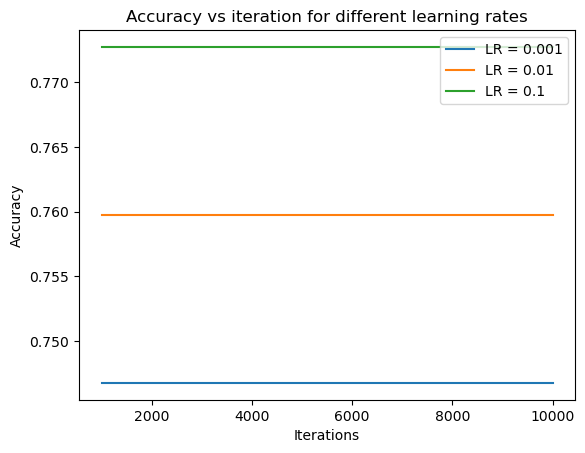

In [17]:
#experimenting with different learning rates and iterations
learning_rates = [0.001,0.01,0.1]
iters = [1000,5000,10000]
results = []

for lr in learning_rates:
    accuracies = []
    for iter in iters:
        perceptron = Perceptron(learning_rate = lr, iters = iter)
        perceptron.fit(X_train, y_train)
        predict = perceptron.predict(X_test)
        accuracy = accuracy_score(y_test,predict)
        accuracies.append(accuracy)
    results.append(accuracies)

#plotting the results
for i,lr in enumerate(learning_rates):
    plt.plot(iters, results[i],label=f'LR = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs iteration for different learning rates')
plt.legend()
plt.show()

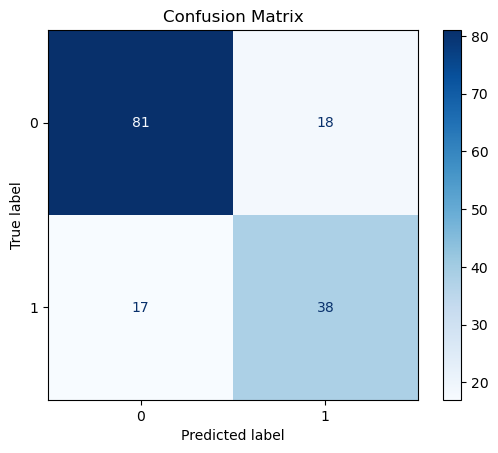

In [21]:
# after trained model and have predictions
predict = perceptron.predict(X_test) # use the scaled test set
# compute confusion matrix
cm = confusion_matrix(y_test, prediction)
# create a confusion matrix display
displ = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=[0,1])
displ.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [22]:
#precision
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)
f1 = f1_score(y_test, predict)
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1-Score:{f1:.2f}")

Precision:0.68
Recall:0.69
F1-Score:0.68
